# GEONE - DEESSE - Using a mask

## Import what is required

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import os

# import package 'geone'
import geone as gn

In [2]:
# Show version of python and version of geone
import sys 
print(sys.version_info)
print('geone version: ' + gn.__version__)

sys.version_info(major=3, minor=11, micro=5, releaselevel='final', serial=0)
geone version: 1.2.17


## Training image (TI)

In [3]:
# Read file 
data_dir = 'data'
filename = os.path.join(data_dir, 'ti.txt')
ti = gn.img.readImageTxt(filename)

# Values in the TI
ti.get_unique()

array([0., 1., 2.])

Plot the image (using the function `geone.imgplot.drawImage2D`).

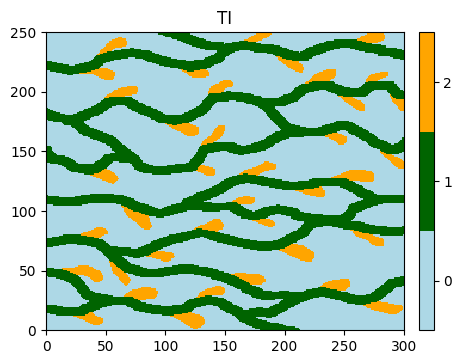

In [4]:
# Setting for categories / colors
categ_val = [0, 1, 2]
categ_col = ['lightblue', 'darkgreen', 'orange']

plt.figure(figsize=(5,5))
gn.imgplot.drawImage2D(ti, categ=True, categVal=categ_val, categCol=categ_col, title='TI')
plt.show()

## Simulation grid and mask
Deesse requires a regular cartesian grid. However, one can specify to deesse to not simulate every cell in the simulation grid. For that, a mask is used: a value (`0` or `1`) is attached to each simulation grid cell indicating that the cell must be simulated (value `1`) or not (value `0`). These values are passed to deesse by an array.

In [5]:
# Read the mask (image) from the file 'mask.txt'
data_dir = 'data'
filename = os.path.join(data_dir, 'mask.txt')
mask = gn.img.readImageTxt(filename)

# Set the simulation grid
nx, ny, nz = mask.nx, mask.ny, mask.nz
sx, sy, sz = mask.sx, mask.sy, mask.sz
ox, oy, oz = mask.ox, mask.oy, mask.oz

# Set mask values to simulation grid cells (1: cell to be simulated)
mask_value = mask.val

## Fill the input structure for deesse and launch deesse

In [6]:
deesse_input = gn.deesseinterface.DeesseInput(
    nx=nx, ny=ny, nz=nz,
    sx=sx, sy=sy, sz=sz,
    ox=ox, oy=oy, oz=oz,
    nv=1, varname='categ',
    TI=ti,
    mask=mask_value,          # set mask
    distanceType='categorical',
    nneighboringNode=24,
    distanceThreshold=0.02,
    maxScanFraction=0.25,
    npostProcessingPathMax=1,
    seed=444,
    nrealization=1)

# Run deesse
t1 = time.time() # start time
deesse_output = gn.deesseinterface.deesseRun(deesse_input)
t2 = time.time() # end time
print(f'Elapsed time: {t2-t1:.2g} sec')

deesseRun: DeeSse running... [VERSION 3.2 / BUILD NUMBER 20230914 / OpenMP 19 thread(s)]
deesseRun: DeeSse run complete
Elapsed time: 0.94 sec


### Display the "mask" and the simulation

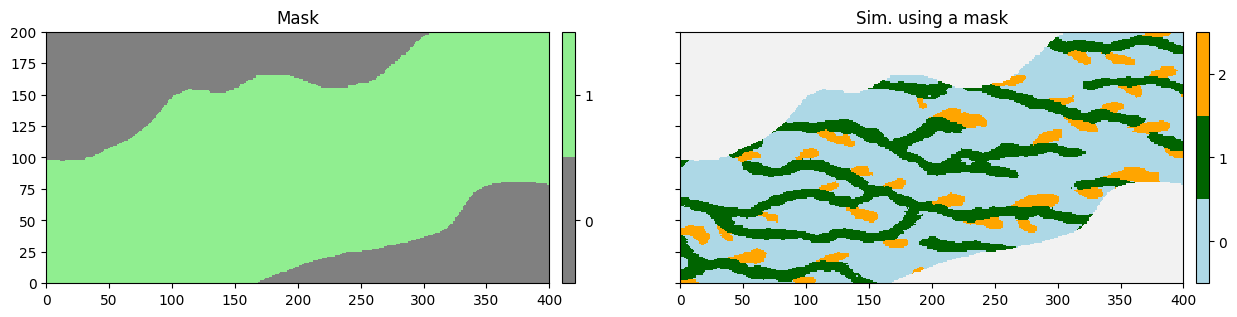

In [7]:
# Retrieve the result
sim = deesse_output['sim']

# Display
plt.subplots(1, 2, figsize=(15,5), sharey=True) # 1 x 2 sub-plots

# ... the mask
plt.subplot(1, 2, 1)
gn.imgplot.drawImage2D(mask, categ=True, categCol=['gray', 'lightgreen'], title='Mask')

# ... the simulation
plt.subplot(1, 2, 2)
gn.imgplot.drawImage2D(sim[0], categ=True, categVal=categ_val, categCol=categ_col, title='Sim. using a mask')

plt.show()